<a href="https://www.kaggle.com/code/nilotpalmaitra/word-embeddings?scriptVersionId=198163356" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **<center>Word Embeddings<center>**
# **<center>The GPS📍for navigating the vast terrain of linguistic landscapes<center>**

Word embeddings are a type of representation for words in natural language processing (NLP) and machine learning. The basic idea behind word embeddings is to convert words into numerical vectors, which capture semantic relationships and contextual information. Unlike traditional methods that represent words as discrete symbols or one-hot encoded vectors, word embeddings aim to capture the meaning of words in a continuous vector space.



# **How word embeddings work?**

1. **Vector Representation:** Each word in vocabulary is represented as a high-dimensional vector in a continuous space. The length of these vectors is predefined and is a hyperparameter of the embedding model.

2. **Semantic Relationships:** The positioning of words in the vector space is such that semantically similar words are closer to each other. This is based on the idea that words with similar meanings tend to occur in similar contexts in language.

3. **Contextual Information:** Word embeddings capture not only the inherent meaning of words but also the context in which they appear. Words that often appear together in sentences will have vectors that are closer in the embedding space.

4. **Training Process:** Word embeddings are learned from large amounts of text data using techniques like Word2Vec, GloVe (Global Vectors for Word Representation), or embeddings derived from neural network language models (like ELMo and BERT). These models are trained to predict words in context or learn co-occurrence statistics.

5. **Transferability:** Once trained on a large corpus, word embeddings can be used for various NLP tasks, such as text classification, sentiment analysis, machine translation, and information retrieval. The pre-trained embeddings can be fine-tuned for specific tasks.

# **Importing Necessary Modules**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import text
from tensorflow.keras.preprocessing.sequence import skipgrams

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Code**

In [2]:
# Sample sentences
sentences = [
    "K3J is a good movie .",
    "Animal is a good movie .",
    "DeshDrohi is a bad movie .",
    "Rascals is a bad movie ."
]

# Tokenize the sentences
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1

# Generate training data for the Skip-gram model with negative sampling
word_target, word_context = [], []
for sequence in tokenizer.texts_to_sequences(sentences):
    pairs, labels = skipgrams(sequence, vocab_size, window_size=1, negative_samples=5)
    word_target.extend([pair[0] for pair in pairs])
    word_context.extend([pair[1] for pair in pairs])

word_target = np.array(word_target, dtype="int32")
word_context = np.array(word_context, dtype="int32")

# Define the Word2Vec model
embedding_size = 3  # You can adjust the embedding size as needed

input_target = tf.keras.layers.Input((1,))
input_context = tf.keras.layers.Input((1,))

embedding = tf.keras.layers.Embedding(vocab_size, embedding_size, input_length=1, name="embedding")
target = embedding(input_target)
context = embedding(input_context)

dot_product = tf.keras.layers.Dot(axes=2)([target, context])
dot_product = tf.keras.layers.Reshape((1,), input_shape=(1, 1))(dot_product)

# Create the Word2Vec model
model = tf.keras.models.Model(inputs=[input_target, input_context], outputs=dot_product)
model.compile(loss="binary_crossentropy", optimizer="adam")

model.fit([word_target, word_context], np.ones(len(word_target)), epochs=100)

# Get the word embeddings
word_embeddings = model.get_layer("embedding").get_weights()[0]

word_index = tokenizer.word_index
word2embedding = {word: word_embeddings[index] for word, index in word_index.items()}

# Print the word embeddings
for word, embedding in word2embedding.items():
    print(f"{word}: {embedding}")


Epoch 1/100
6/6 [==============================] - 1s 4ms/step - loss: 11.7932
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 11.6425
Epoch 3/100
6/6 [==============================] - 0s 42ms/step - loss: 11.3694
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 11.1841
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 11.0891
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 10.8906
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 10.3705
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 9.6141
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 9.4911
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 9.4181
Epoch 11/100
6/6 [==============================] - 0s 3ms/step - loss: 9.3102
Epoch 12/100
6/6 [==============================] - 0s 3ms/step - loss: 9.1066
Epoch 13/100
6/6 [==============================] - 0

# **Code Explained**


**1. Define Sample Sentences:**
```python
sentences = [
    "K3J is a good movie .",
    "Animal is a good movie .",
    "DeshDrohi is a bad movie .",
    "Rascals is a bad movie ."
]
```

Here, we have a list of sample sentences that will be used to train the Word2Vec model.

**2. Tokenize Sentences:**
```python
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1
```

The `Tokenizer` is used to convert sentences into sequences of integers. `fit_on_texts` is used to update the internal vocabulary based on the given sentences, and `vocab_size` is calculated to determine the size of the vocabulary.

**3. Generate Training Data:**
```python
word_target, word_context = [], []
for sequence in tokenizer.texts_to_sequences(sentences):
    pairs, labels = skipgrams(sequence, vocab_size, window_size=1, negative_samples=5)
    word_target.extend([pair[0] for pair in pairs])
    word_context.extend([pair[1] for pair in pairs])

word_target = np.array(word_target, dtype="int32")
word_context = np.array(word_context, dtype="int32")
```

This part generates training data for the Skip-gram model with negative sampling. It iterates through tokenized sequences of sentences, generates skip-grams using `skipgrams` function, and creates two lists: `word_target` and `word_context`.

**4. Define Word2Vec Model:**
```python
embedding_size = 3

input_target = tf.keras.layers.Input((1,))
input_context = tf.keras.layers.Input((1,))

embedding = tf.keras.layers.Embedding(vocab_size, embedding_size, input_length=1, name="embedding")
target = embedding(input_target)
context = embedding(input_context)

dot_product = tf.keras.layers.Dot(axes=2)([target, context])
dot_product = tf.keras.layers.Reshape((1,), input_shape=(1, 1))(dot_product)

model = tf.keras.models.Model(inputs=[input_target, input_context], outputs=dot_product)
model.compile(loss="binary_crossentropy", optimizer="adam")
```

This part defines the Word2Vec model. It uses two input layers (`input_target` and `input_context`), an embedding layer (`embedding`), and a dot product layer (`dot_product`). The model is then compiled with binary cross-entropy loss and the Adam optimizer.

**5. Train the Word2Vec Model:**
```python
model.fit([word_target, word_context], np.ones(len(word_target)), epochs=10)
```

The model is trained using the generated training data. It uses the dot product of target and context word embeddings as the target, and binary labels (all ones) for training.

# **Explaing the results :**

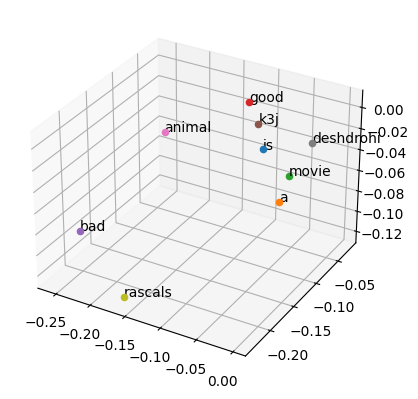

In [3]:
fig = plt.figure()
ax = plt.axes(projection ="3d")

for word, embedding in word2embedding.items():
    ax.scatter3D(embedding[0],embedding[1],embedding[2])
    ax.text(embedding[0],embedding[1],embedding[2],word)
plt.show()

We can clearly see that the movies which we termed good are some what clustered together . Hence `Word Embeddings` are able to provide context even in numerical representation of data . 